<a href="https://colab.research.google.com/github/RucheshPatel/Fuzzy-Inference-System/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [55]:
import warnings

warnings.filterwarnings('ignore')

In [56]:
data = 'bill_authentication.csv'

df = pd.read_csv(data, header=None)

In [57]:
# view dimensions of dataset

df.shape

(1373, 5)

In [58]:
# preview the dataset

df.head()

,0,1,2,3,4
0,Variance,Skewness,Curtosis,Entropy,Class
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0


In [59]:
col_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

df.columns = col_names

col_names

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [60]:
# let's again preview the dataset

df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,Variance,Skewness,Curtosis,Entropy,Class
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variance  1373 non-null   object
 1   Skewness  1373 non-null   object
 2   Curtosis  1373 non-null   object
 3   Entropy   1373 non-null   object
 4   Class     1373 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB


In [62]:
col_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']


for col in col_names:

    print(df[col].value_counts())

0.5706     5
0.5195     4
0.3292     4
0.3798     4
-0.2062    3
          ..
4.5707     1
2.9742     1
1.1472     1
-2.6989    1
-2.5419    1
Name: Variance, Length: 1339, dtype: int64
-4.4552     6
-3.2633     5
-0.0248     4
0.7098      4
-3.7971     4
           ..
8.811       1
6.4023      1
7.2797      1
2.1086      1
-0.65804    1
Name: Skewness, Length: 1257, dtype: int64
4.5718     5
1.2421     5
3.0895     5
0.7572     4
-1.331     3
          ..
1.0588     1
-0.7843    1
-2.9024    1
1.9387     1
2.6842     1
Name: Curtosis, Length: 1271, dtype: int64
-0.9888     5
-0.2957     5
-0.23751    4
0.3211      4
0.36119     4
           ..
1.0698      1
0.75558     1
-0.44182    1
-0.2401     1
-2.7771     1
Name: Entropy, Length: 1157, dtype: int64
0        762
1        610
Class      1
Name: Class, dtype: int64


In [63]:
df['Class'].value_counts()

0        762
1        610
Class      1
Name: Class, dtype: int64

In [64]:
# check missing values in variables

df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [65]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [66]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [67]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((919, 4), (454, 4))

In [68]:
# check data types in X_train

X_train.dtypes

Variance    object
Skewness    object
Curtosis    object
Entropy     object
dtype: object

In [69]:
X_train.head()

,Variance,Skewness,Curtosis,Entropy
1094,0.74428,-3.7723,1.6131,1.5754
224,4.6464,10.5326,-4.5852,-4.206
939,-4.3773,-5.5167,10.939,-0.4082
274,2.6946,6.7976,-0.40301,0.44912
323,-1.7344,2.0175,7.7618,0.93532


In [71]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [72]:
# import category encoders

import category_encoders as ce

In [75]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Variance', 'Skewness', 'Curtosis', 'Entropy'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [76]:
X_train.head()

,Variance,Skewness,Curtosis,Entropy
1094,1,1,1,1
224,2,2,2,2
939,3,3,3,3
274,4,4,4,4
323,5,5,5,5


In [77]:
X_test.head()

,Variance,Skewness,Curtosis,Entropy
430,-1.0,-1.0,-1.0,-1.0
588,-1.0,831.0,-1.0,-1.0
296,-1.0,-1.0,-1.0,-1.0
184,-1.0,-1.0,-1.0,-1.0
244,-1.0,717.0,-1.0,686.0


In [78]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [79]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [80]:
y_pred_gini = clf_gini.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5661


In [82]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [83]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5560


In [84]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5560
Test set score: 0.5661


[Text(0.625, 0.875, 'x[3] <= 808.5\ngini = 0.496\nsamples = 919\nvalue = [505, 413, 1]'),
 Text(0.5, 0.625, 'x[1] <= 426.5\ngini = 0.495\nsamples = 913\nvalue = [505, 407, 1]'),
 Text(0.25, 0.375, 'x[1] <= 420.5\ngini = 0.488\nsamples = 459\nvalue = [268, 190, 1]'),
 Text(0.125, 0.125, 'gini = 0.49\nsamples = 452\nvalue = [261, 190, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.75, 0.375, 'x[3] <= 87.0\ngini = 0.499\nsamples = 454\nvalue = [237, 217, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 448\nvalue = [231, 217, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]')]

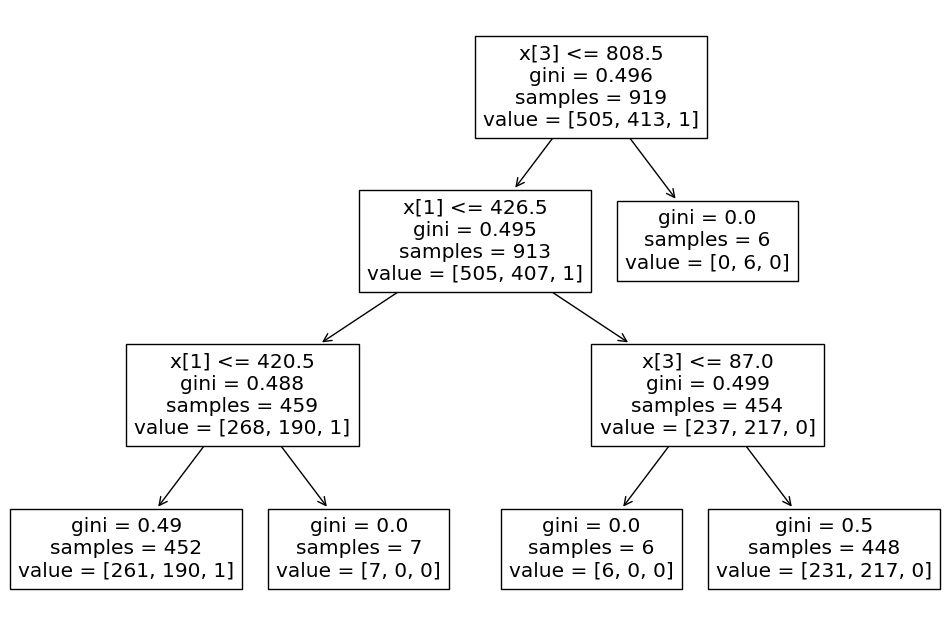

In [85]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

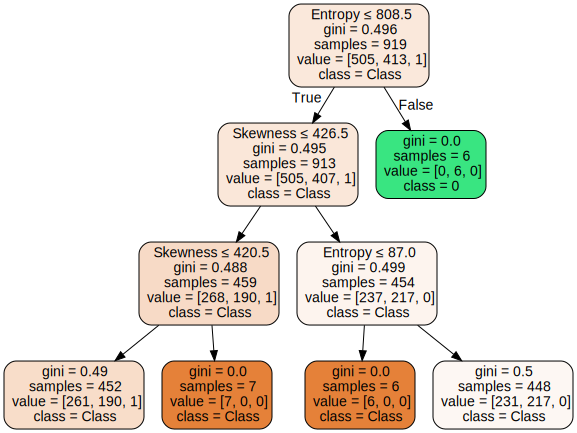

In [86]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [87]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [88]:
y_pred_en = clf_en.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5661


In [90]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [91]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.5560


In [92]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5560
Test set score: 0.5661


[Text(0.625, 0.875, 'x[3] <= 808.5\nentropy = 1.004\nsamples = 919\nvalue = [505, 413, 1]'),
 Text(0.5, 0.625, 'x[1] <= 426.5\nentropy = 1.003\nsamples = 913\nvalue = [505, 407, 1]'),
 Text(0.25, 0.375, 'x[1] <= 420.5\nentropy = 0.999\nsamples = 459\nvalue = [268, 190, 1]'),
 Text(0.125, 0.125, 'entropy = 1.003\nsamples = 452\nvalue = [261, 190, 1]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.75, 0.375, 'x[3] <= 87.0\nentropy = 0.999\nsamples = 454\nvalue = [237, 217, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.875, 0.125, 'entropy = 0.999\nsamples = 448\nvalue = [231, 217, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]')]

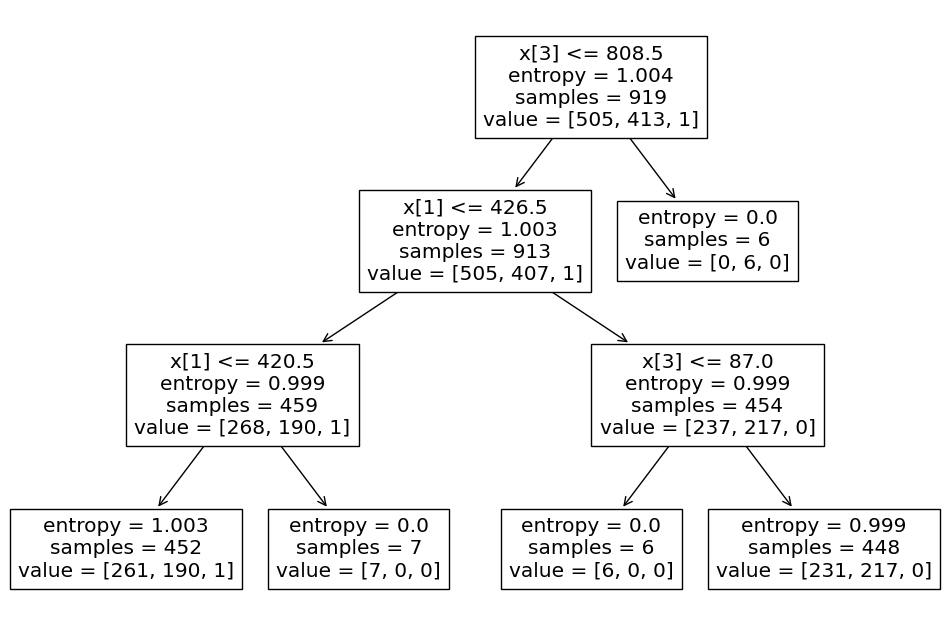

In [93]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

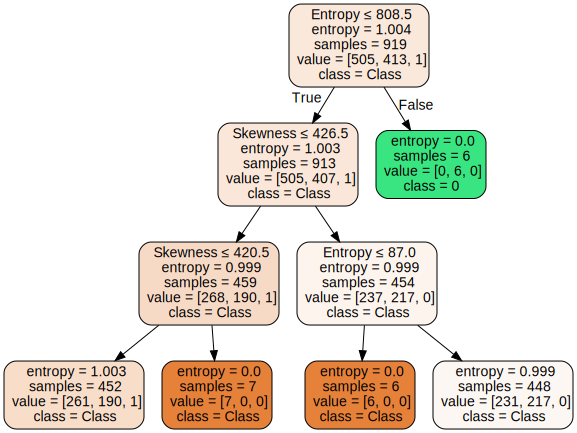

In [94]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [95]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[257   0]
 [197   0]]


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72       257
           1       0.00      0.00      0.00       197

    accuracy                           0.57       454
   macro avg       0.28      0.50      0.36       454
weighted avg       0.32      0.57      0.41       454

